In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
import matplotlib.backends.backend_pdf as pdfFig
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')


In [102]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']
color_list4 = ["#FF1F5B", "#00CD6C", "#009ADE", "#AF58BA", "#FFC61E", "#F28522", "#A0B1BA", "#A6761D", "#00B000", "#E9002D", "#FFAA00"]

In [103]:
ful_graph_list = [
    "333SP"
    , "4elt"
    , "AS365"
    , "G3_circuit"
    , "G_n_pin_pout"
    , "M6"
    , "NACA0015"
    , "NLR"
    , "Oregon-2"
    , "af_shell10"
    , "af_shell9"
    , "asia"
    , "belgium"
    , "ca-AstroPh"
    , "ca-CondMat"
    , "ca-HepPh"
    , "ca-HepTh"
    , "cage15"
    , "caidaRouterLevel"
    , "citationCiteseer"
    , "cnr-2000"
    , "coAuthorsCiteseer"
    , "coAuthorsDBLP"
    , "coPapersCiteseer"
    , "coPapersDBLP"
    , "copter2"
    , "delaunay_n11"
    , "delaunay_n12"
    , "delaunay_n13"
    , "delaunay_n14"
    , "delaunay_n15"
    , "delaunay_n16"
    , "delaunay_n17"
    , "delaunay_n18"
    , "delaunay_n19"
    , "delaunay_n20"
    , "delaunay_n21"
    , "delaunay_n22"
    , "delaunay_n23"
    , "delaunay_n24"
    , "ecology1"
    , "ecology2"
    , "email-Enron"
    , "eu-2005"
    , "europe"
    , "fe_sphere"
    , "germany"
    , "great-britain"
    , "hugebubbles-00000"
    , "hugebubbles-00010"
    , "hugebubbles-00020"
    , "hugetrace-00000"
    , "hugetrace-00010"
    , "hugetrace-00020"
    , "hugetric-00000"
    , "hugetric-00010"
    , "hugetric-00020"
    , "in-2004"
    , "inf-europe_osm"
    , "inf-italy_osm"
    , "italy"
    , "kkt_power"
    , "ldoor"
    , "loc-Brightkite"
    , "loc-Gowalla"
    , "luxembourg"
    , "mdual"
    , "netherlands"
    , "nlpkkt120"
    , "nlpkkt160"
    , "nlpkkt200"
    , "nlpkkt240"
    , "nlpkkt80"
    , "roadNet-PA"
    , "roadNet-TX"
    , "road_central"
    , "road_usa"
    , "smallworld"
    , "thermal2"
    , "uk"
    , "uk2002"
    , "uk-2002"
]
better_result_graphs = [
     "delaunay_n11"
    , "delaunay_n12"
    , "delaunay_n13"
    , "delaunay_n14"
    , "delaunay_n15"
    , "delaunay_n16"
    , "delaunay_n17"
    , "delaunay_n18"
    , "delaunay_n19"
    , "delaunay_n20"
    , "delaunay_n21"
    , "delaunay_n22"
    , "delaunay_n23"
    , "delaunay_n24"
    , "nlpkkt120"
    , "nlpkkt160"
    , "nlpkkt200"
    , "nlpkkt240"
    , "nlpkkt80"
]
graph_list = [
    "333SP"
#     , "4elt"
    , "AS365"
#     , "G3_circuit"
#     , "G_n_pin_pout"
    , "M6"
    , "NACA0015"
    , "NLR"
    , "Oregon-2"
#     , "af_shell9"
    , "asia"
    , "belgium"
#     , "ca-AstroPh"
#     , "ca-CondMat"
#     , "ca-HepPh"
#     , "ca-HepTh"
#     , "cage15"
#     , "citationCiteseer"
#     , "cnr-2000"
#     , "coAuthorsDBLP"
#     , "coPapersDBLP"
#     , "copter2"
    , "delaunay_n24"
#     , "ecology1"
#     , "email-Enron"
    , "europe"
    , "germany"
#     , "great-britain"
#     , "hugebubbles-00000"
    , "in-2004"
#     , "inf-europe_osm"
#     , "italy"
    , "kkt_power"
#     , "ldoor"
#     , "loc-Brightkite"
    , "loc-Gowalla"
    , "luxembourg"
#     , "mdual"
    , "netherlands"
#     , "nlpkkt80"
#     , "nlpkkt120"
#     , "nlpkkt160"
    , "nlpkkt200"
#     , "nlpkkt240"
    , "roadNet-PA"
#     , "smallworld"
#     , "thermal2"
    , "uk-2002"
]

# Label Propagation Method for Cascade Lake Processor

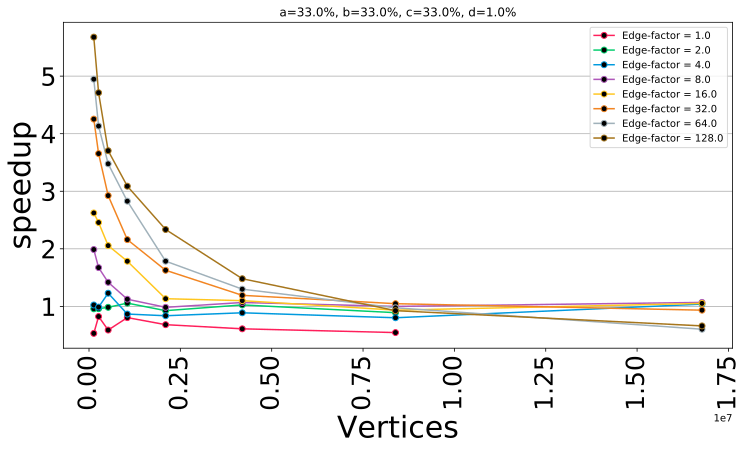

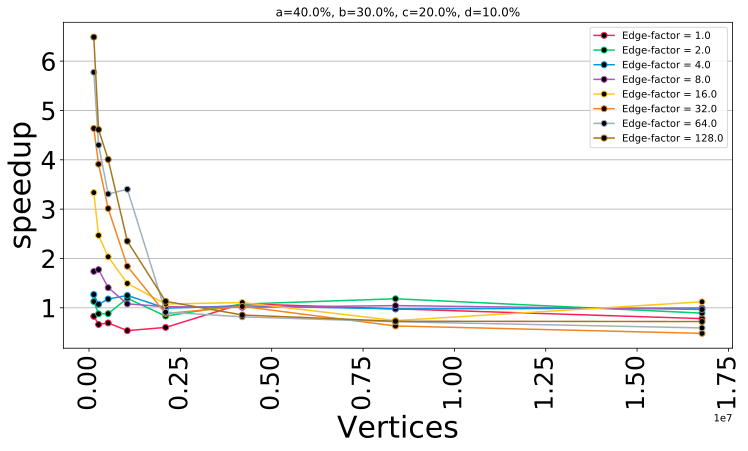

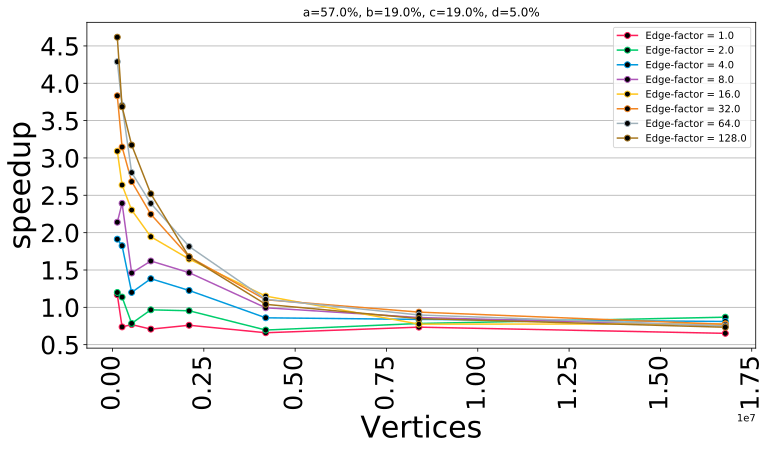

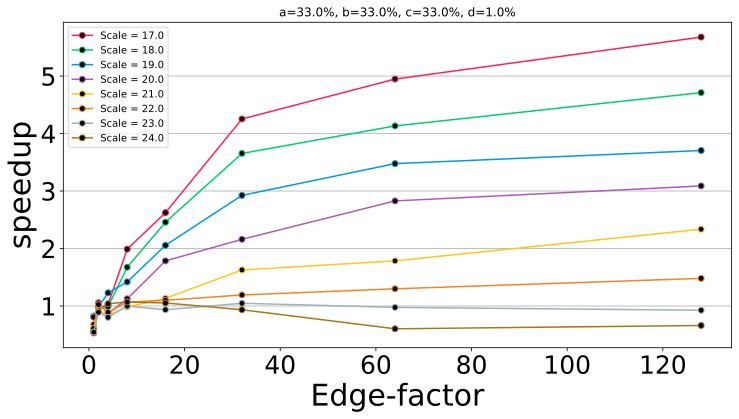

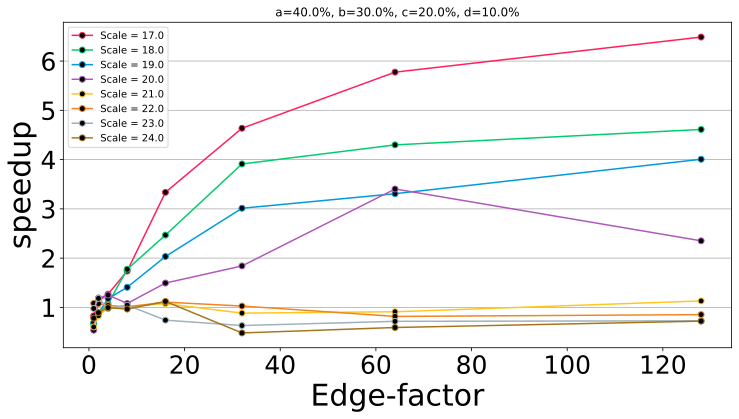

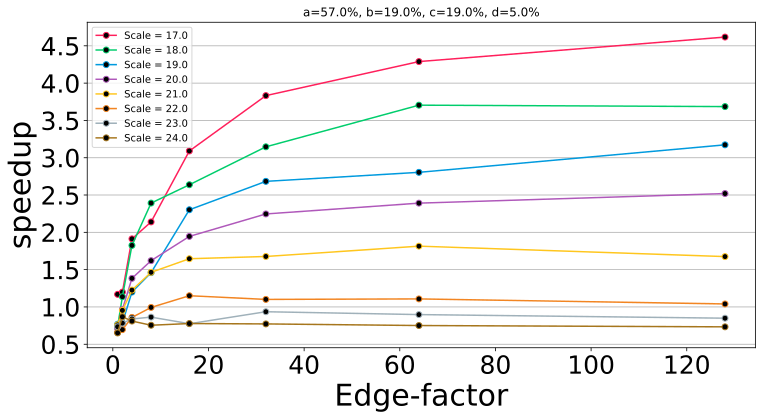

In [104]:

rmat_cascade_data = pd.read_csv("build/RMAT_Results/RMAT_Partial_Vec_CascadeLake.csv")
rmat_cascade_data = rmat_cascade_data.groupby(["GraphName", "Version"]).mean().reset_index()
rmat_lp_cascade_data = rmat_cascade_data[rmat_cascade_data["Version"].isin(["PLP", "MPLP", "ONLP"])].reset_index()
speedup = []
for i,r in rmat_lp_cascade_data.iterrows():
    rmat_lp_cascade_data.at[i, "a"] = int("{:.0f}".format(r["a"]*100))
    rmat_lp_cascade_data.at[i, "b"] = int("{:.0f}".format(r["b"]*100))
    rmat_lp_cascade_data.at[i, "c"] = int("{:.0f}".format(r["c"]*100))
    rmat_lp_cascade_data.at[i, "d"] = int("{:.0f}".format(r["d"]*100))
for i,r in rmat_lp_cascade_data.iterrows():
    mplp = rmat_lp_cascade_data[(rmat_lp_cascade_data["GraphName"] == r["GraphName"]) & 
                               (rmat_lp_cascade_data["Version"] == "MPLP") & 
                               (rmat_lp_cascade_data["Scale"] == r["Scale"]) & 
                               (rmat_lp_cascade_data["EdgeFactor"] == r["EdgeFactor"]) & 
                               (rmat_lp_cascade_data["a"] == r["a"]) & 
                               (rmat_lp_cascade_data["b"] == r["b"]) & 
                               (rmat_lp_cascade_data["c"] == r["c"]) & 
                               (rmat_lp_cascade_data["d"] == r["d"])]
    if len(mplp) <= 0:
        print(r["GraphName"])
        speedup.append(0)
    else:
        speedup.append(mplp.iloc[0]["MoveTime"]/r["MoveTime"])
        
rmat_lp_cascade_data["MPLP/ONLP"] = speedup
rmat_lp_cascade_data = rmat_lp_cascade_data.reset_index(drop=True)


## Bar Plots
# pdf1 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/cascade_label_propagation_perfomance_gain_against_vertices.pdf")
# for a,group in rmat_lp_cascade_data[rmat_lp_cascade_data["Version"] == "ONLP"].reset_index().groupby("a"):
#     fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='Nodes', columns="EdgeFactor", values=["MPLP/ONLP"])
#     ax = fd.plot.bar(color=color_list4, rot=90, figsize=(12,6), legend=True, fontsize=25)
#     ax.set_xlabel("Vertices", fontsize = 30)
#     ax.set_ylabel("speedup", fontsize = 30)
#     ax.grid(axis="y")
#     b = group.iloc[0]["b"]
#     c = group.iloc[0]["c"]
#     d = group.iloc[0]["d"]
#     title_txt = "a=" + str(a) + " b=" + str(b) + " c=" + str(c) + " d=" + str(d)
#     legend_txt = []
#     for ef,ef_group in group.groupby("EdgeFactor"):
#         legend_txt.append("Edge-factor = " + str(ef))
#     ax.legend(legend_txt)
#     ax.set_title(title_txt)
#     pdf1.savefig(bbox_inches = 'tight')
# pdf1.close()

# pdf2 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/cascade_label_propagation_perfomance_gain_against_edge_factor.pdf")
# for a,group in rmat_lp_cascade_data[rmat_lp_cascade_data["Version"] == "ONLP"].reset_index().groupby("a"):
#     fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='EdgeFactor', columns="Scale", values=["MPLP/ONLP"])
#     ax = fd.plot.bar(color=color_list4, rot=0, figsize=(12,6), legend=True, fontsize=25)
#     ax.set_xlabel("Edge-factor", fontsize = 30)
#     ax.set_ylabel("speedup", fontsize = 30)
#     ax.grid(axis="y")
#     b = group.iloc[0]["b"]
#     c = group.iloc[0]["c"]
#     d = group.iloc[0]["d"]
#     title_txt = "a=" + str(a) + " b=" + str(b) + " c=" + str(c) + " d=" + str(d)
#     legend_txt = []
#     for ef,ef_group in group.groupby("Scale"):
#         legend_txt.append("Scale = " + str(ef))
#     ax.legend(legend_txt)
#     ax.set_title(title_txt)
#     pdf2.savefig(bbox_inches = 'tight')
# pdf2.close()

## Line plots
pdf1 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/cascade_label_propagation_perfomance_gain_against_vertices.pdf")
for a,group in rmat_lp_cascade_data[rmat_lp_cascade_data["Version"] == "ONLP"].reset_index().groupby("a"):
    fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='Nodes', columns="EdgeFactor", values=["MPLP/ONLP"])
    ax = fd.plot.line(color=color_list4, linestyle='-', marker='o', markerfacecolor='black', rot=90, figsize=(12,6), legend=True, fontsize=25)
    ax.set_xlabel("Vertices", fontsize = 30)
    ax.set_ylabel("speedup", fontsize = 30)
    ax.grid(axis="y")
    b = group.iloc[0]["b"]
    c = group.iloc[0]["c"]
    d = group.iloc[0]["d"]
    title_txt = "a=" + str(a) + "%, b=" + str(b) + "%, c=" + str(c) + "%, d=" + str(d) + "%"
    legend_txt = []
    for ef,ef_group in group.groupby("EdgeFactor"):
        legend_txt.append("Edge-factor = " + str(ef))
    ax.legend(legend_txt)
    ax.set_title(title_txt)
    pdf1.savefig(bbox_inches = 'tight')
pdf1.close()

pdf2 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/cascade_label_propagation_perfomance_gain_against_edge_factor.pdf")
for a,group in rmat_lp_cascade_data[rmat_lp_cascade_data["Version"] == "ONLP"].reset_index().groupby("a"):
    fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='EdgeFactor', columns="Scale", values=["MPLP/ONLP"])
    ax = fd.plot.line(color=color_list4, linestyle='-', marker='o', markerfacecolor='black', rot=0, figsize=(12,6), legend=True, fontsize=25)
    ax.set_xlabel("Edge-factor", fontsize = 30)
    ax.set_ylabel("speedup", fontsize = 30)
    ax.grid(axis="y")
    b = group.iloc[0]["b"]
    c = group.iloc[0]["c"]
    d = group.iloc[0]["d"]
    title_txt = "a=" + str(a) + "%, b=" + str(b) + "%, c=" + str(c) + "%, d=" + str(d) + "%"
    legend_txt = []
    for ef,ef_group in group.groupby("Scale"):
        legend_txt.append("Scale = " + str(ef))
    ax.legend(legend_txt)
    ax.set_title(title_txt)
    pdf2.savefig(bbox_inches = 'tight')
pdf2.close()

# Label Propagation Method for Skylake Processor

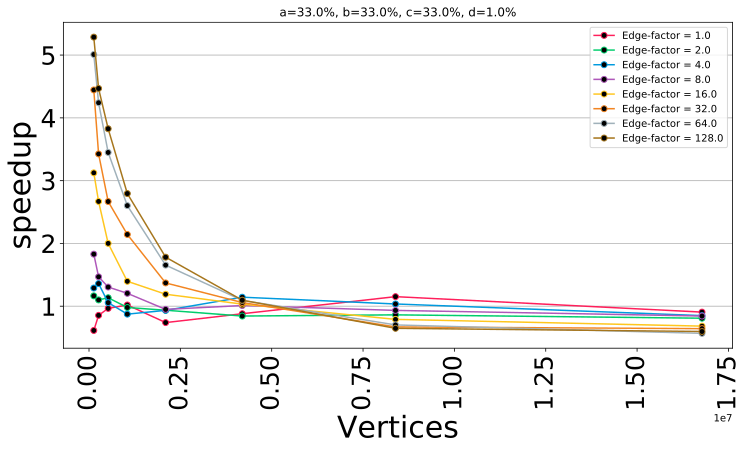

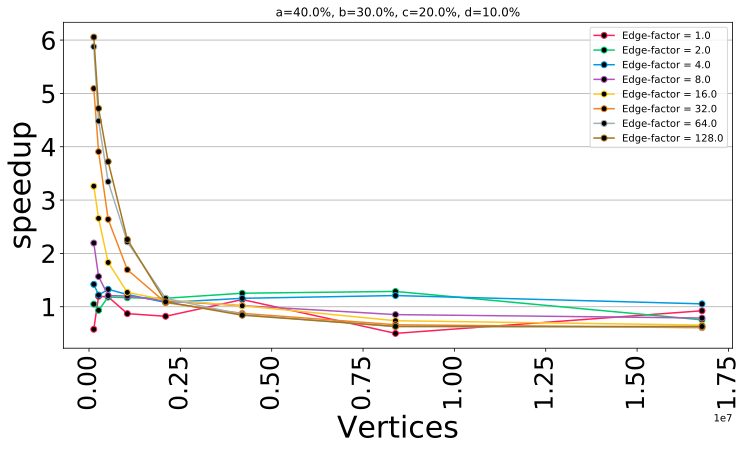

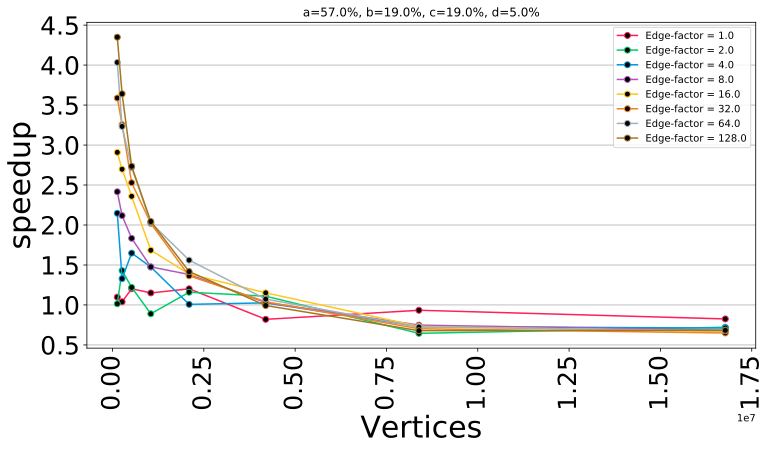

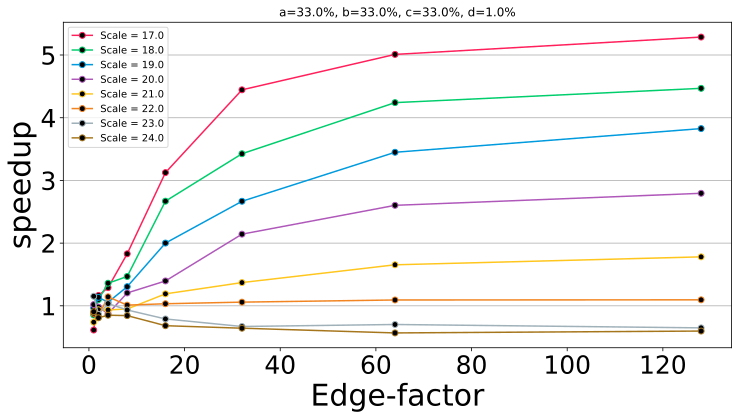

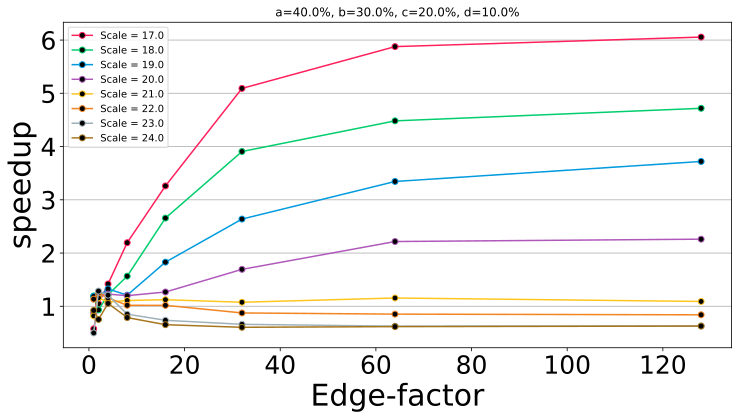

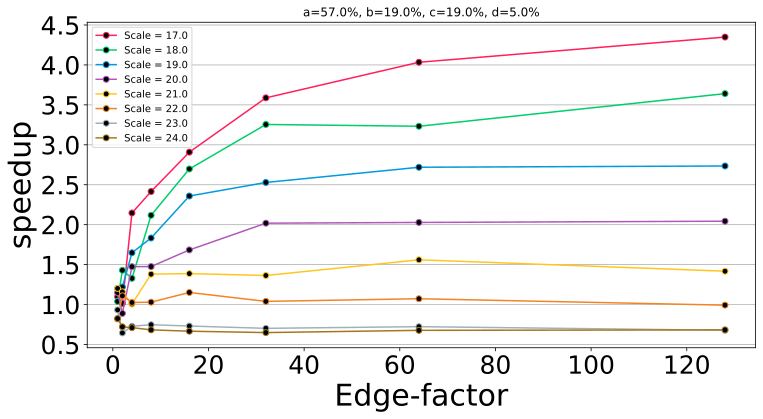

In [105]:

rmat_cascade_data = pd.read_csv("build/RMAT_Results/RMAT_Partial_Vec_SkyLake.csv")
rmat_cascade_data = rmat_cascade_data.groupby(["GraphName", "Version"]).mean().reset_index()
rmat_lp_cascade_data = rmat_cascade_data[rmat_cascade_data["Version"].isin(["PLP", "MPLP", "ONLP"])].reset_index()
speedup = []
for i,r in rmat_lp_cascade_data.iterrows():
    rmat_lp_cascade_data.at[i, "a"] = int("{:.0f}".format(r["a"]*100))
    rmat_lp_cascade_data.at[i, "b"] = int("{:.0f}".format(r["b"]*100))
    rmat_lp_cascade_data.at[i, "c"] = int("{:.0f}".format(r["c"]*100))
    rmat_lp_cascade_data.at[i, "d"] = int("{:.0f}".format(r["d"]*100))
for i,r in rmat_lp_cascade_data.iterrows():
    mplp = rmat_lp_cascade_data[(rmat_lp_cascade_data["GraphName"] == r["GraphName"]) & 
                               (rmat_lp_cascade_data["Version"] == "MPLP") & 
                               (rmat_lp_cascade_data["Scale"] == r["Scale"]) & 
                               (rmat_lp_cascade_data["EdgeFactor"] == r["EdgeFactor"]) & 
                               (rmat_lp_cascade_data["a"] == r["a"]) & 
                               (rmat_lp_cascade_data["b"] == r["b"]) & 
                               (rmat_lp_cascade_data["c"] == r["c"]) & 
                               (rmat_lp_cascade_data["d"] == r["d"])]
    if len(mplp) <= 0:
        print(r["GraphName"])
        speedup.append(0)
    else:
        speedup.append(mplp.iloc[0]["MoveTime"]/r["MoveTime"])
        
rmat_lp_cascade_data["MPLP/ONLP"] = speedup
rmat_lp_cascade_data = rmat_lp_cascade_data.reset_index(drop=True)


## Bar Plots
# pdf1 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/skylake_label_propagation_perfomance_gain_against_vertices.pdf")
# for a,group in rmat_lp_cascade_data[rmat_lp_cascade_data["Version"] == "ONLP"].reset_index().groupby("a"):
#     fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='Nodes', columns="EdgeFactor", values=["MPLP/ONLP"])
#     ax = fd.plot.bar(color=color_list4, rot=90, figsize=(12,6), legend=True, fontsize=25)
#     ax.set_xlabel("Vertices", fontsize = 30)
#     ax.set_ylabel("speedup", fontsize = 30)
#     ax.grid(axis="y")
#     b = group.iloc[0]["b"]
#     c = group.iloc[0]["c"]
#     d = group.iloc[0]["d"]
#     title_txt = "a=" + str(a) + " b=" + str(b) + " c=" + str(c) + " d=" + str(d)
#     legend_txt = []
#     for ef,ef_group in group.groupby("EdgeFactor"):
#         legend_txt.append("Edge-factor = " + str(ef))
#     ax.legend(legend_txt)
#     ax.set_title(title_txt)
#     pdf1.savefig(bbox_inches = 'tight')
# pdf1.close()

# pdf2 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/skylake_label_propagation_perfomance_gain_against_edge_factor.pdf")
# for a,group in rmat_lp_cascade_data[rmat_lp_cascade_data["Version"] == "ONLP"].reset_index().groupby("a"):
#     fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='EdgeFactor', columns="Scale", values=["MPLP/ONLP"])
#     ax = fd.plot.bar(color=color_list4, rot=0, figsize=(12,6), legend=True, fontsize=25)
#     ax.set_xlabel("Edge-factor", fontsize = 30)
#     ax.set_ylabel("speedup", fontsize = 30)
#     ax.grid(axis="y")
#     b = group.iloc[0]["b"]
#     c = group.iloc[0]["c"]
#     d = group.iloc[0]["d"]
#     title_txt = "a=" + str(a) + " b=" + str(b) + " c=" + str(c) + " d=" + str(d)
#     legend_txt = []
#     for ef,ef_group in group.groupby("Scale"):
#         legend_txt.append("Scale = " + str(ef))
#     ax.legend(legend_txt)
#     ax.set_title(title_txt)
#     pdf2.savefig(bbox_inches = 'tight')
# pdf2.close()

## Line plots
pdf1 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/Skylake/skylake_label_propagation_perfomance_gain_against_vertices.pdf")
for a,group in rmat_lp_cascade_data[rmat_lp_cascade_data["Version"] == "ONLP"].reset_index().groupby("a"):
    fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='Nodes', columns="EdgeFactor", values=["MPLP/ONLP"])
    ax = fd.plot.line(color=color_list4, linestyle='-', marker='o', markerfacecolor='black', rot=90, figsize=(12,6), legend=True, fontsize=25)
    ax.set_xlabel("Vertices", fontsize = 30)
    ax.set_ylabel("speedup", fontsize = 30)
    ax.grid(axis="y")
    b = group.iloc[0]["b"]
    c = group.iloc[0]["c"]
    d = group.iloc[0]["d"]
    title_txt = "a=" + str(a) + "%, b=" + str(b) + "%, c=" + str(c) + "%, d=" + str(d) + "%"
    legend_txt = []
    for ef,ef_group in group.groupby("EdgeFactor"):
        legend_txt.append("Edge-factor = " + str(ef))
    ax.legend(legend_txt)
    ax.set_title(title_txt)
    pdf1.savefig(bbox_inches = 'tight')
pdf1.close()

pdf2 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/Skylake/skylake_label_propagation_perfomance_gain_against_edge_factor.pdf")
for a,group in rmat_lp_cascade_data[rmat_lp_cascade_data["Version"] == "ONLP"].reset_index().groupby("a"):
    fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='EdgeFactor', columns="Scale", values=["MPLP/ONLP"])
    ax = fd.plot.line(color=color_list4, linestyle='-', marker='o', markerfacecolor='black', rot=0, figsize=(12,6), legend=True, fontsize=25)
    ax.set_xlabel("Edge-factor", fontsize = 30)
    ax.set_ylabel("speedup", fontsize = 30)
    ax.grid(axis="y")
    b = group.iloc[0]["b"]
    c = group.iloc[0]["c"]
    d = group.iloc[0]["d"]
    title_txt = "a=" + str(a) + "%, b=" + str(b) + "%, c=" + str(c) + "%, d=" + str(d) + "%"
    legend_txt = []
    for ef,ef_group in group.groupby("Scale"):
        legend_txt.append("Scale = " + str(ef))
    ax.legend(legend_txt)
    ax.set_title(title_txt)
    pdf2.savefig(bbox_inches = 'tight')
pdf2.close()

In [34]:

rmat_lp_cascade_data[(rmat_lp_cascade_data["a"] == 40) & (rmat_lp_cascade_data["Version"] == "ONLP") & (rmat_lp_cascade_data["Scale"] == 17)]


,index,GraphName,Version,Nodes,Edges,Wall Time,CPU Time,Clusters,Modularity,MaxIterations,...,CacheMissCount,Refine,StablePartitioningTime,Scale,EdgeFactor,a,b,c,d,MPLP/ONLP
4,9,RMAT_17_1-0.400000-0.300000-0.200000-0.100000,ONLP,131072.0,131072.0,0.028711,1.373714,56750.916667,0.518634,25.0,...,0.0,0.0,4.025000e-08,17.0,1.0,40.0,30.0,20.0,10.0,0.827273
13,30,RMAT_17_128-0.400000-0.300000-0.200000-0.100000,ONLP,131072.0,16777216.0,0.086103,4.091691,2.000000,0.000000,25.0,...,0.0,0.0,6.625000e-08,17.0,128.0,40.0,30.0,20.0,10.0,6.486737
22,51,RMAT_17_16-0.400000-0.300000-0.200000-0.100000,ONLP,131072.0,2097152.0,0.038091,1.819009,1107.000000,0.000000,25.0,...,0.0,0.0,7.566667e-08,17.0,16.0,40.0,30.0,20.0,10.0,3.335227
28,67,RMAT_17_2-0.400000-0.300000-0.200000-0.100000,ONLP,131072.0,262144.0,0.039348,1.868117,30278.916667,0.026701,25.0,...,0.0,0.0,4.150000e-08,17.0,2.0,40.0,30.0,20.0,10.0,1.127962
37,88,RMAT_17_32-0.400000-0.300000-0.200000-0.100000,ONLP,131072.0,4194304.0,0.044178,2.084054,166.000000,0.000000,25.0,...,0.0,0.0,4.475000e-08,17.0,32.0,40.0,30.0,20.0,10.0,4.636000
43,104,RMAT_17_4-0.400000-0.300000-0.200000-0.100000,ONLP,131072.0,524288.0,0.034189,1.603396,13949.750000,0.000183,25.0,...,0.0,0.0,4.500000e-08,17.0,4.0,40.0,30.0,20.0,10.0,1.268966
52,125,RMAT_17_64-0.400000-0.300000-0.200000-0.100000,ONLP,131072.0,8388608.0,0.060517,2.868241,9.000000,0.000000,25.0,...,0.0,0.0,5.933333e-08,17.0,64.0,40.0,30.0,20.0,10.0,5.775000
61,146,RMAT_17_8-0.400000-0.300000-0.200000-0.100000,ONLP,131072.0,1048576.0,0.037282,1.719460,4794.250000,0.000007,25.0,...,0.0,0.0,5.495833e-08,17.0,8.0,40.0,30.0,20.0,10.0,1.737401


# Louvain Method for Cascade Lake Processor

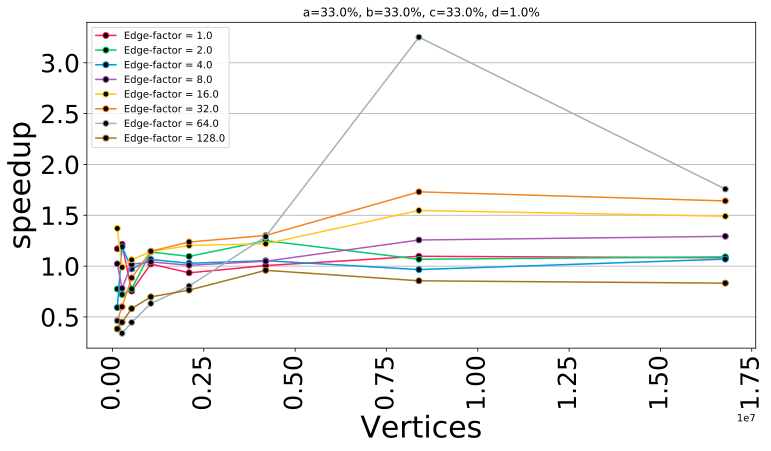

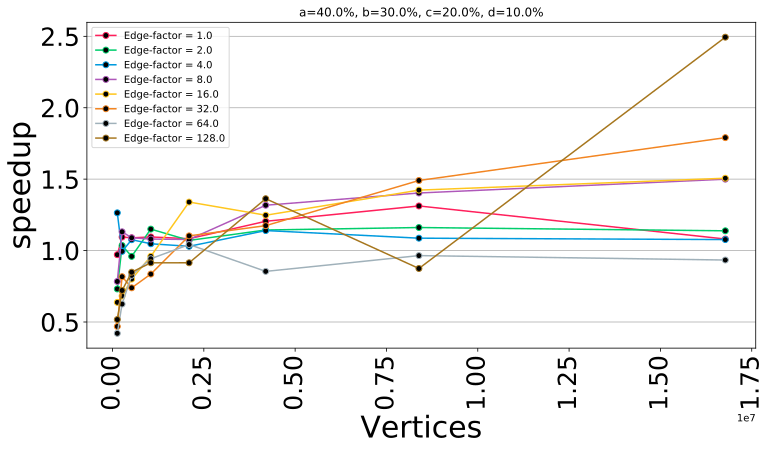

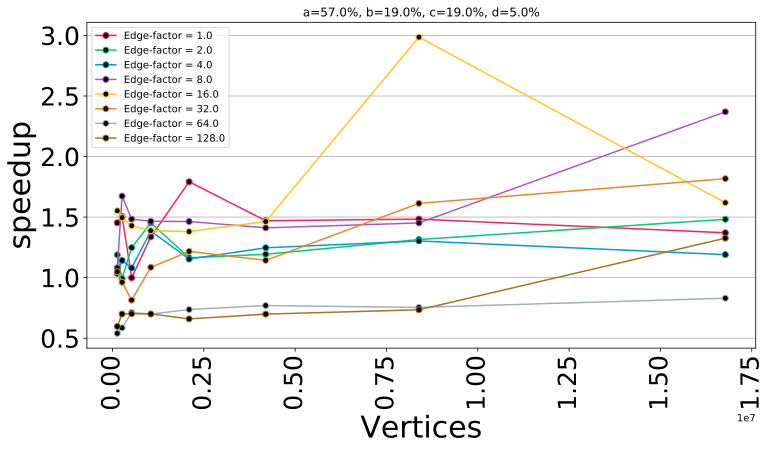

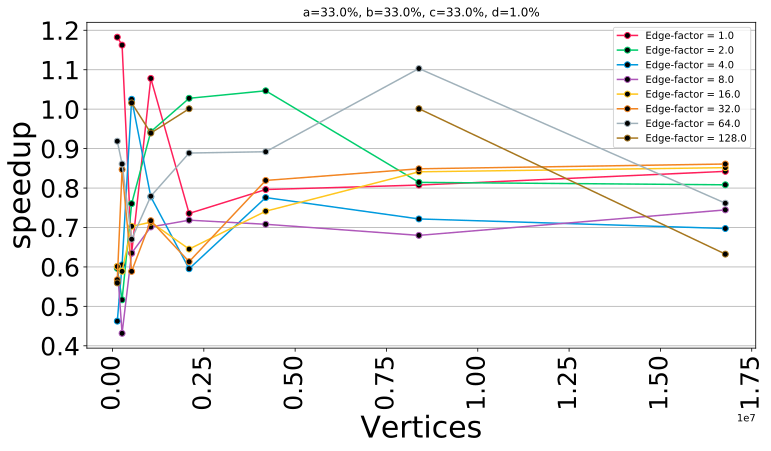

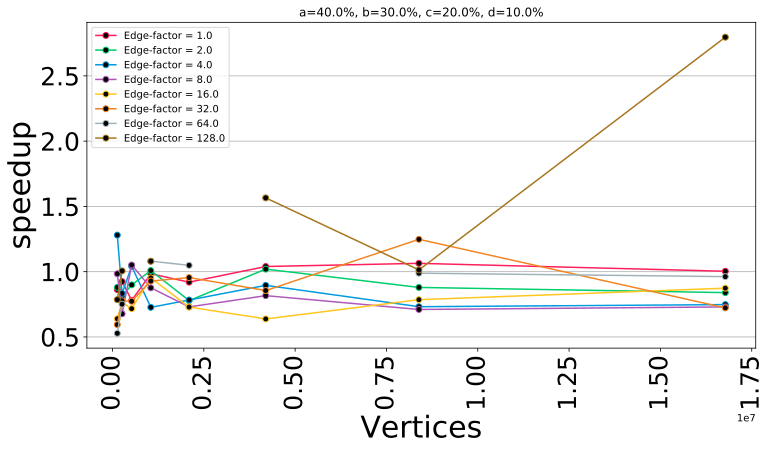

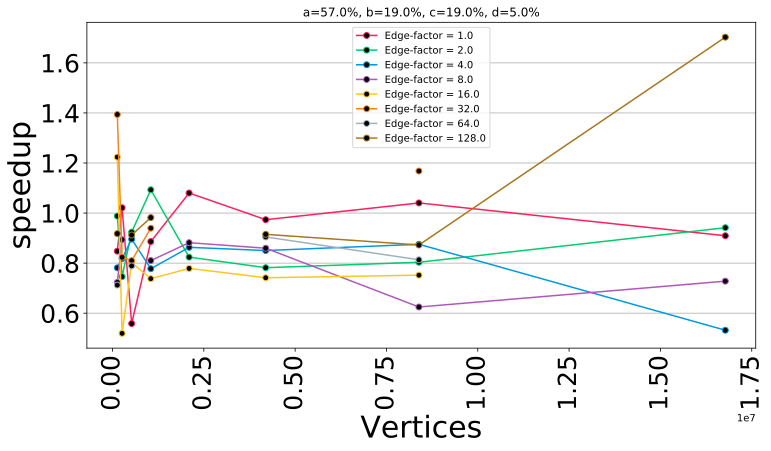

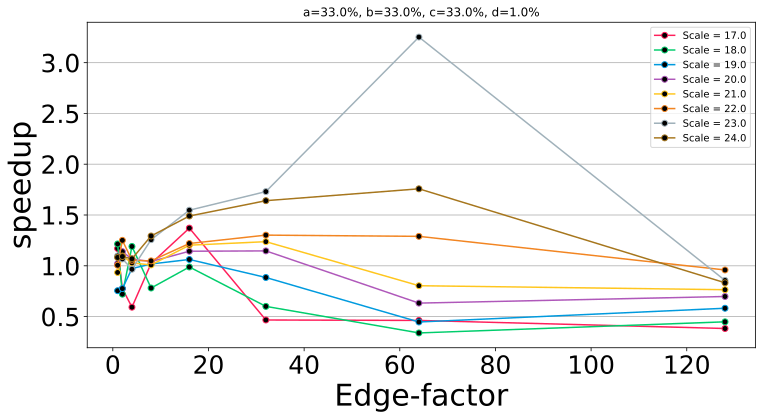

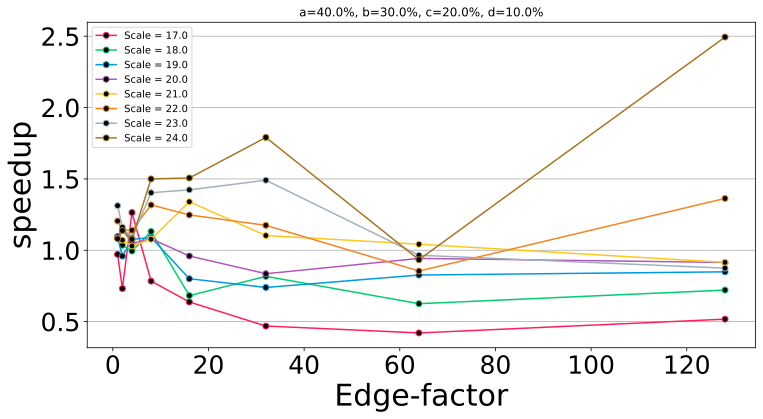

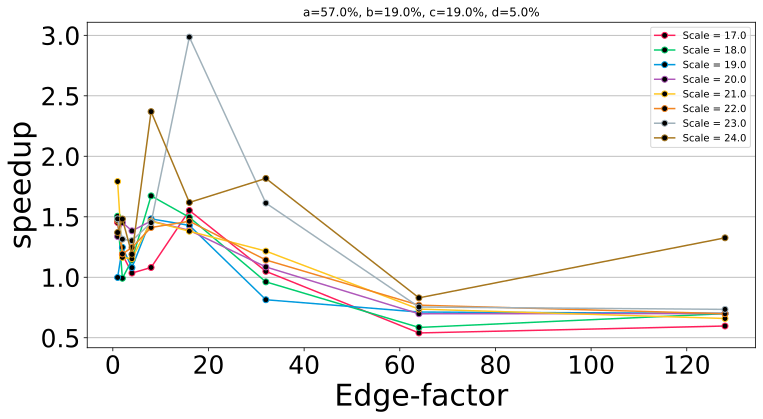

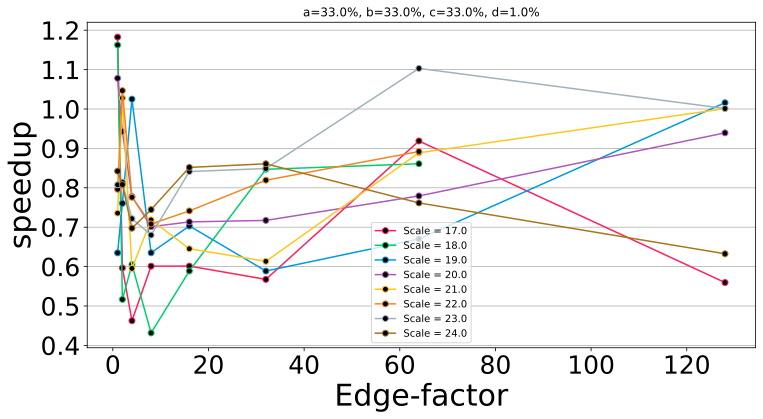

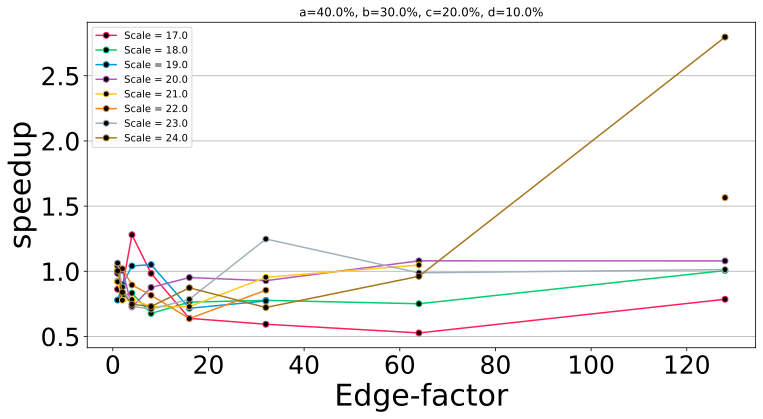

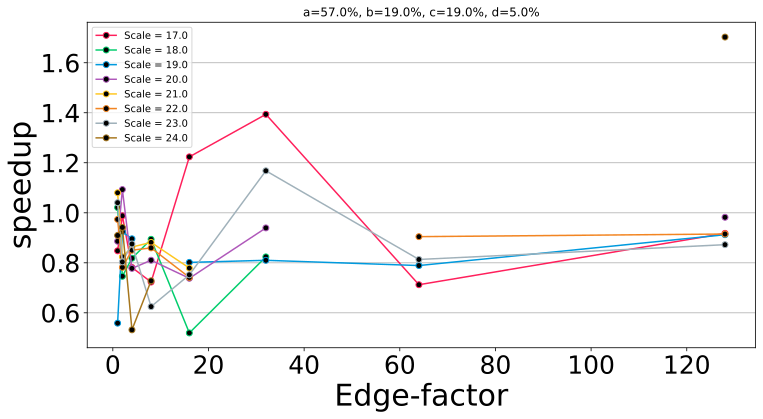

In [111]:

rmat_cascade_data = pd.read_csv("build/RMAT_Results/RMAT_Partial_Vec_CascadeLake.csv")
rmat_cascade_data = rmat_cascade_data.groupby(["GraphName", "Version"]).mean().reset_index()
rmat_lm_cascade_data = rmat_cascade_data[rmat_cascade_data["Version"].isin(["PLM", "MPLM", "ONPL", "OVPL"])].reset_index()
speedup = []
for i,r in rmat_lm_cascade_data.iterrows():
    rmat_lm_cascade_data.at[i, "a"] = int("{:.0f}".format(r["a"]*100))
    rmat_lm_cascade_data.at[i, "b"] = int("{:.0f}".format(r["b"]*100))
    rmat_lm_cascade_data.at[i, "c"] = int("{:.0f}".format(r["c"]*100))
    rmat_lm_cascade_data.at[i, "d"] = int("{:.0f}".format(r["d"]*100))
for i,r in rmat_lm_cascade_data.iterrows():
    mplm = rmat_lm_cascade_data[(rmat_lm_cascade_data["GraphName"] == r["GraphName"]) & 
                               (rmat_lm_cascade_data["Version"] == "MPLM") & 
                               (rmat_lm_cascade_data["Scale"] == r["Scale"]) & 
                               (rmat_lm_cascade_data["EdgeFactor"] == r["EdgeFactor"]) & 
                               (rmat_lm_cascade_data["a"] == r["a"]) & 
                               (rmat_lm_cascade_data["b"] == r["b"]) & 
                               (rmat_lm_cascade_data["c"] == r["c"]) & 
                               (rmat_lm_cascade_data["d"] == r["d"])]
    if len(mplm) <= 0:
        print(r["GraphName"])
        speedup.append(0)
    else:
        speedup.append(mplm.iloc[0]["MoveTime"]/r["MoveTime"])
        
rmat_lm_cascade_data["Speedup"] = speedup
rmat_lm_cascade_data = rmat_lm_cascade_data.reset_index(drop=True)

pdf1 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/cascade_onpl_perfomance_gain_against_vertices.pdf")
for a,group in rmat_lm_cascade_data[rmat_lm_cascade_data["Version"] == "ONPL"].reset_index().groupby("a"):
    fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='Nodes', columns="EdgeFactor", values=["Speedup"])
    ax = fd.plot.line(color=color_list4, linestyle='-', marker='o', markerfacecolor='black', rot=90, figsize=(12,6), legend=True, fontsize=25)
    ax.set_xlabel("Vertices", fontsize = 30)
    ax.set_ylabel("speedup", fontsize = 30)
    ax.grid(axis="y")
    b = group.iloc[0]["b"]
    c = group.iloc[0]["c"]
    d = group.iloc[0]["d"]
    title_txt = "a=" + str(a) + "%, b=" + str(b) + "%, c=" + str(c) + "%, d=" + str(d) + "%"
    legend_txt = []
    for ef,ef_group in group.groupby("EdgeFactor"):
        legend_txt.append("Edge-factor = " + str(ef))
    ax.legend(legend_txt)
    ax.set_title(title_txt)
    pdf1.savefig(bbox_inches = 'tight')
pdf1.close()

pdf1 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/cascade_ovpl_perfomance_gain_against_vertices.pdf")
for a,group in rmat_lm_cascade_data[rmat_lm_cascade_data["Version"] == "OVPL"].reset_index().groupby("a"):
    fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='Nodes', columns="EdgeFactor", values=["Speedup"])
    ax = fd.plot.line(color=color_list4, linestyle='-', marker='o', markerfacecolor='black', rot=90, figsize=(12,6), legend=True, fontsize=25)
    ax.set_xlabel("Vertices", fontsize = 30)
    ax.set_ylabel("speedup", fontsize = 30)
    ax.grid(axis="y")
    b = group.iloc[0]["b"]
    c = group.iloc[0]["c"]
    d = group.iloc[0]["d"]
    title_txt = "a=" + str(a) + "%, b=" + str(b) + "%, c=" + str(c) + "%, d=" + str(d) + "%"
    legend_txt = []
    for ef,ef_group in group.groupby("EdgeFactor"):
        legend_txt.append("Edge-factor = " + str(ef))
    ax.legend(legend_txt)
    ax.set_title(title_txt)
    pdf1.savefig(bbox_inches = 'tight')
pdf1.close()

pdf2 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/cascade_onpl_perfomance_gain_against_edge_factor.pdf")
for a,group in rmat_lm_cascade_data[rmat_lm_cascade_data["Version"] == "ONPL"].reset_index().groupby("a"):
    fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='EdgeFactor', columns="Scale", values=["Speedup"])
    ax = fd.plot.line(color=color_list4, linestyle='-', marker='o', markerfacecolor='black', rot=0, figsize=(12,6), legend=True, fontsize=25)
    ax.set_xlabel("Edge-factor", fontsize = 30)
    ax.set_ylabel("speedup", fontsize = 30)
    ax.grid(axis="y")
    b = group.iloc[0]["b"]
    c = group.iloc[0]["c"]
    d = group.iloc[0]["d"]
    title_txt = "a=" + str(a) + "%, b=" + str(b) + "%, c=" + str(c) + "%, d=" + str(d) + "%"
    legend_txt = []
    for ef,ef_group in group.groupby("Scale"):
        legend_txt.append("Scale = " + str(ef))
    ax.legend(legend_txt)
    ax.set_title(title_txt)
    pdf2.savefig(bbox_inches = 'tight')
pdf2.close()


pdf2 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/cascade_ovpl_perfomance_gain_against_edge_factor.pdf")
for a,group in rmat_lm_cascade_data[rmat_lm_cascade_data["Version"] == "OVPL"].reset_index().groupby("a"):
    fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='EdgeFactor', columns="Scale", values=["Speedup"])
    ax = fd.plot.line(color=color_list4, linestyle='-', marker='o', markerfacecolor='black', rot=0, figsize=(12,6), legend=True, fontsize=25)
    ax.set_xlabel("Edge-factor", fontsize = 30)
    ax.set_ylabel("speedup", fontsize = 30)
    ax.grid(axis="y")
    b = group.iloc[0]["b"]
    c = group.iloc[0]["c"]
    d = group.iloc[0]["d"]
    title_txt = "a=" + str(a) + "%, b=" + str(b) + "%, c=" + str(c) + "%, d=" + str(d) + "%"
    legend_txt = []
    for ef,ef_group in group.groupby("Scale"):
        legend_txt.append("Scale = " + str(ef))
    ax.legend(legend_txt)
    ax.set_title(title_txt)
    pdf2.savefig(bbox_inches = 'tight')
pdf2.close()


# Louvain Method for Skylake Processor

RMAT_17_128-0.570000-0.190000-0.190000-0.050000
RMAT_17_128-0.570000-0.190000-0.190000-0.050000
RMAT_17_64-0.400000-0.300000-0.200000-0.100000
RMAT_17_64-0.400000-0.300000-0.200000-0.100000
RMAT_17_64-0.570000-0.190000-0.190000-0.050000
RMAT_17_64-0.570000-0.190000-0.190000-0.050000
RMAT_18_128-0.330000-0.330000-0.330000-0.010000
RMAT_18_128-0.330000-0.330000-0.330000-0.010000
RMAT_18_128-0.400000-0.300000-0.200000-0.100000
RMAT_18_128-0.400000-0.300000-0.200000-0.100000
RMAT_18_128-0.570000-0.190000-0.190000-0.050000
RMAT_18_128-0.570000-0.190000-0.190000-0.050000
RMAT_18_16-0.400000-0.300000-0.200000-0.100000
RMAT_18_16-0.400000-0.300000-0.200000-0.100000
RMAT_18_64-0.570000-0.190000-0.190000-0.050000
RMAT_18_64-0.570000-0.190000-0.190000-0.050000
RMAT_18_8-0.570000-0.190000-0.190000-0.050000
RMAT_18_8-0.570000-0.190000-0.190000-0.050000
RMAT_19_128-0.330000-0.330000-0.330000-0.010000
RMAT_19_128-0.330000-0.330000-0.330000-0.010000
RMAT_19_128-0.400000-0.300000-0.200000-0.100000
RMAT

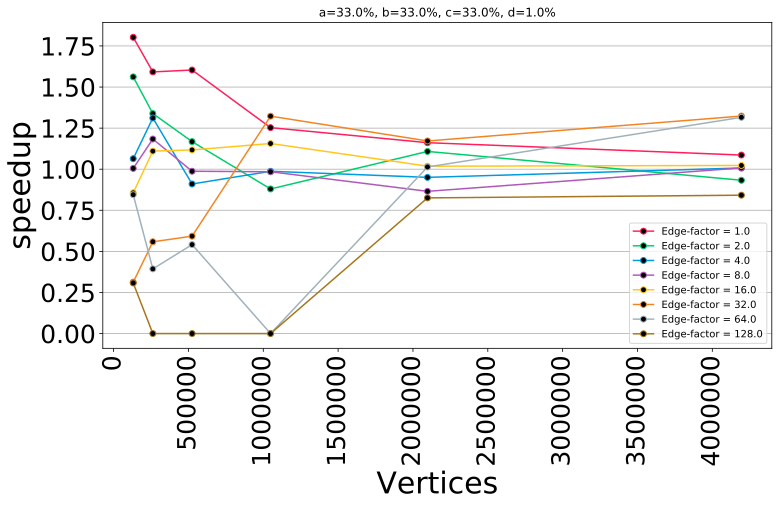

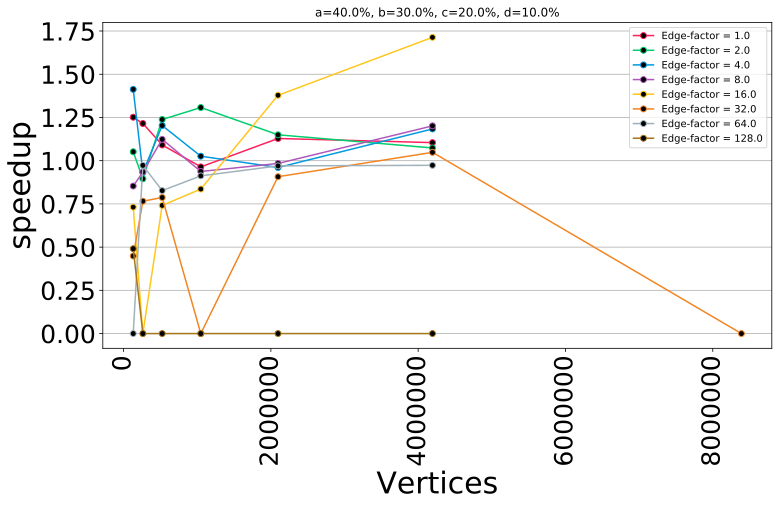

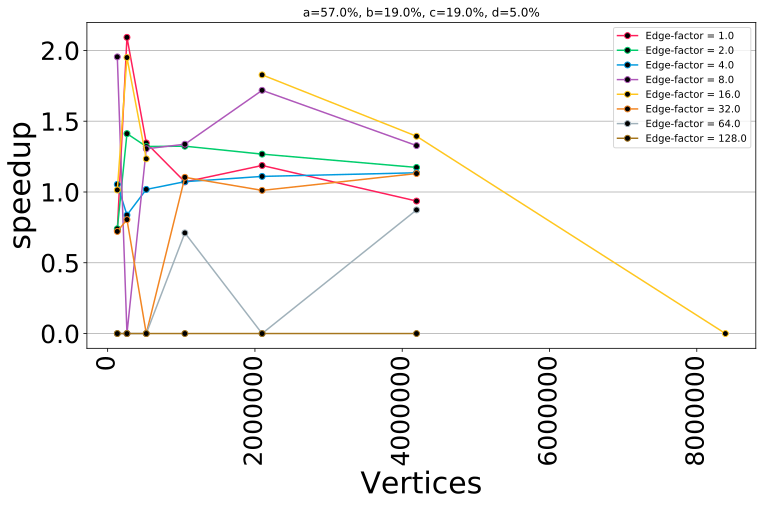

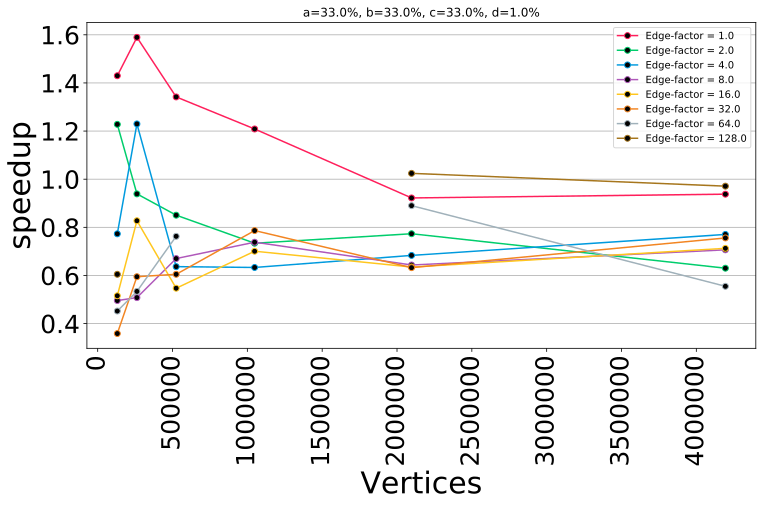

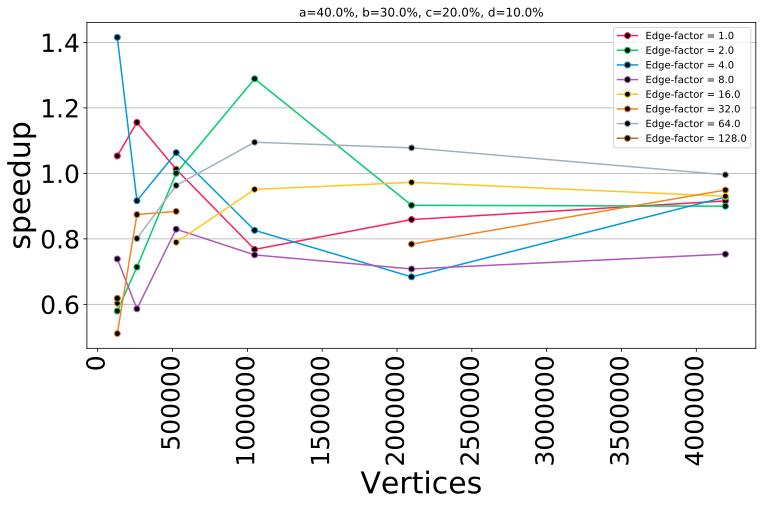

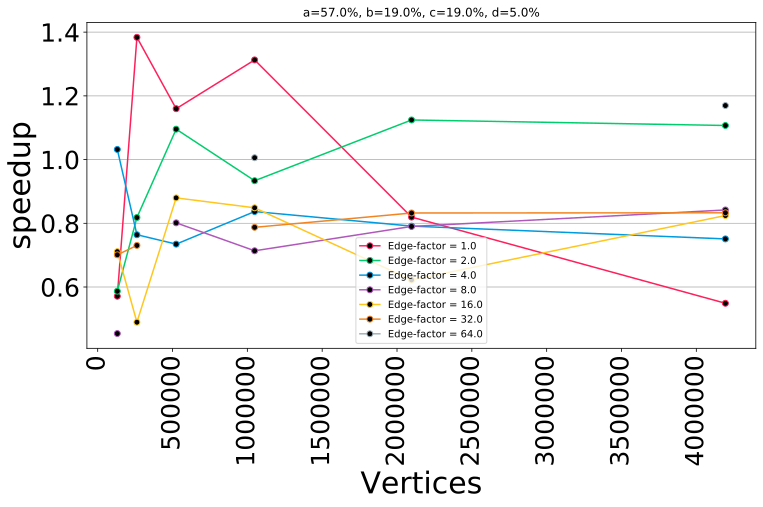

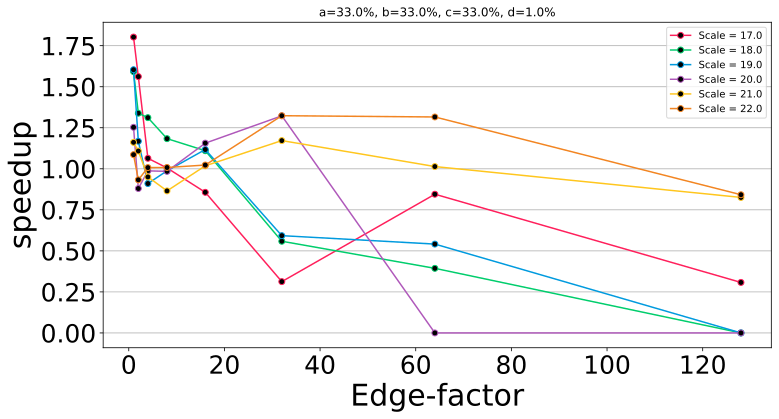

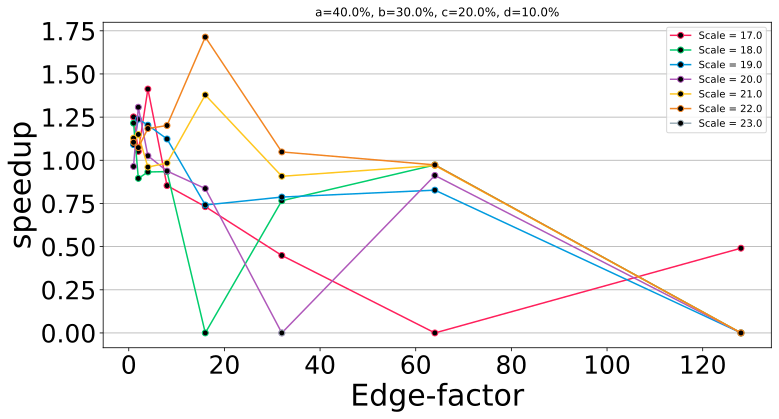

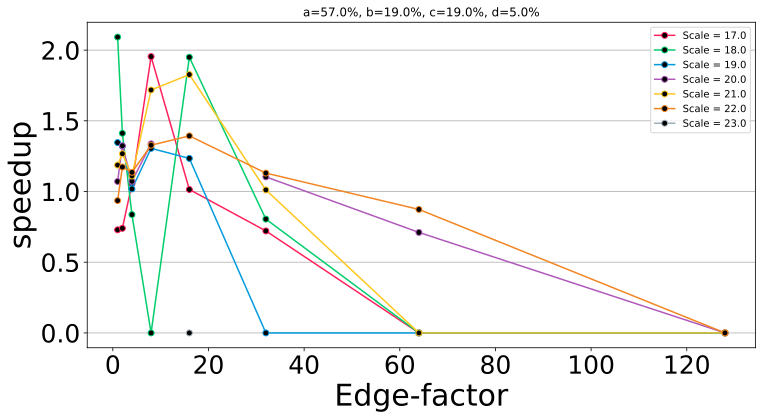

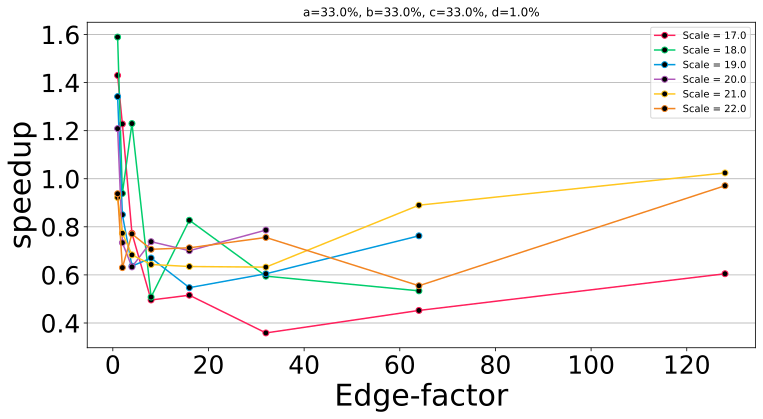

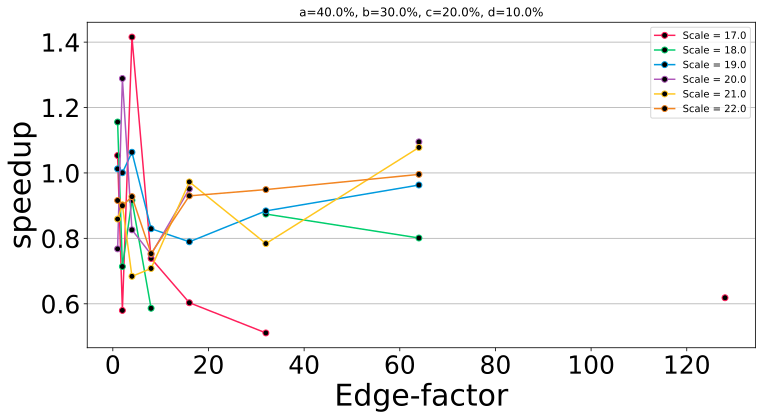

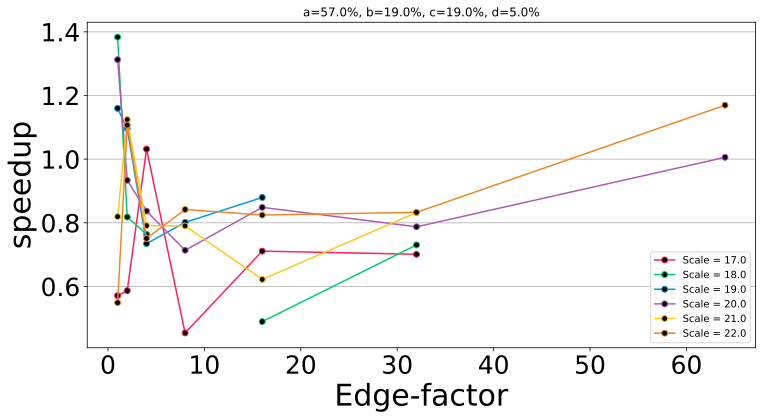

In [112]:

rmat_skylake_data = pd.read_csv("build/RMAT_Results/RMAT_Partial_Vec_SkyLake.csv")
rmat_skylake_data = rmat_skylake_data.groupby(["GraphName", "Version"]).mean().reset_index()
rmat_lm_skylake_data = rmat_skylake_data[rmat_skylake_data["Version"].isin(["PLM", "MPLM", "ONPL", "OVPL"])].reset_index()
speedup = []
for i,r in rmat_lm_skylake_data.iterrows():
    rmat_lm_skylake_data.at[i, "a"] = int("{:.0f}".format(r["a"]*100))
    rmat_lm_skylake_data.at[i, "b"] = int("{:.0f}".format(r["b"]*100))
    rmat_lm_skylake_data.at[i, "c"] = int("{:.0f}".format(r["c"]*100))
    rmat_lm_skylake_data.at[i, "d"] = int("{:.0f}".format(r["d"]*100))
for i,r in rmat_lm_skylake_data.iterrows():
    mplm = rmat_lm_skylake_data[(rmat_lm_skylake_data["GraphName"] == r["GraphName"]) & 
                               (rmat_lm_skylake_data["Version"] == "MPLM") & 
                               (rmat_lm_skylake_data["Scale"] == r["Scale"]) & 
                               (rmat_lm_skylake_data["EdgeFactor"] == r["EdgeFactor"]) & 
                               (rmat_lm_skylake_data["a"] == r["a"]) & 
                               (rmat_lm_skylake_data["b"] == r["b"]) & 
                               (rmat_lm_skylake_data["c"] == r["c"]) & 
                               (rmat_lm_skylake_data["d"] == r["d"])]
    if len(mplm) <= 0:
        print(r["GraphName"])
        speedup.append(0)
    else:
        speedup.append(mplm.iloc[0]["MoveTime"]/r["MoveTime"])
        
rmat_lm_skylake_data["Speedup"] = speedup
rmat_lm_skylake_data = rmat_lm_skylake_data.reset_index(drop=True)

pdf1 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/skylake_onpl_perfomance_gain_against_vertices.pdf")
for a,group in rmat_lm_skylake_data[rmat_lm_skylake_data["Version"] == "ONPL"].reset_index().groupby("a"):
    fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='Nodes', columns="EdgeFactor", values=["Speedup"])
    ax = fd.plot.line(color=color_list4, linestyle='-', marker='o', markerfacecolor='black', rot=90, figsize=(12,6), legend=True, fontsize=25)
    ax.set_xlabel("Vertices", fontsize = 30)
    ax.set_ylabel("speedup", fontsize = 30)
    ax.grid(axis="y")
    b = group.iloc[0]["b"]
    c = group.iloc[0]["c"]
    d = group.iloc[0]["d"]
    title_txt = "a=" + str(a) + "%, b=" + str(b) + "%, c=" + str(c) + "%, d=" + str(d) + "%"
    legend_txt = []
    for ef,ef_group in group.groupby("EdgeFactor"):
        legend_txt.append("Edge-factor = " + str(ef))
    ax.legend(legend_txt)
    ax.set_title(title_txt)
    pdf1.savefig(bbox_inches = 'tight')
pdf1.close()

pdf1 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/skylake_ovpl_perfomance_gain_against_vertices.pdf")
for a,group in rmat_lm_skylake_data[rmat_lm_skylake_data["Version"] == "OVPL"].reset_index().groupby("a"):
    fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='Nodes', columns="EdgeFactor", values=["Speedup"])
    ax = fd.plot.line(color=color_list4, linestyle='-', marker='o', markerfacecolor='black', rot=90, figsize=(12,6), legend=True, fontsize=25)
    ax.set_xlabel("Vertices", fontsize = 30)
    ax.set_ylabel("speedup", fontsize = 30)
    ax.grid(axis="y")
    b = group.iloc[0]["b"]
    c = group.iloc[0]["c"]
    d = group.iloc[0]["d"]
    title_txt = "a=" + str(a) + "%, b=" + str(b) + "%, c=" + str(c) + "%, d=" + str(d) + "%"
    legend_txt = []
    for ef,ef_group in group.groupby("EdgeFactor"):
        legend_txt.append("Edge-factor = " + str(ef))
    ax.legend(legend_txt)
    ax.set_title(title_txt)
    pdf1.savefig(bbox_inches = 'tight')
pdf1.close()

pdf2 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/skylake_onpl_perfomance_gain_against_edge_factor.pdf")
for a,group in rmat_lm_skylake_data[rmat_lm_skylake_data["Version"] == "ONPL"].reset_index().groupby("a"):
    fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='EdgeFactor', columns="Scale", values=["Speedup"])
    ax = fd.plot.line(color=color_list4, linestyle='-', marker='o', markerfacecolor='black', rot=0, figsize=(12,6), legend=True, fontsize=25)
    ax.set_xlabel("Edge-factor", fontsize = 30)
    ax.set_ylabel("speedup", fontsize = 30)
    ax.grid(axis="y")
    b = group.iloc[0]["b"]
    c = group.iloc[0]["c"]
    d = group.iloc[0]["d"]
    title_txt = "a=" + str(a) + "%, b=" + str(b) + "%, c=" + str(c) + "%, d=" + str(d) + "%"
    legend_txt = []
    for ef,ef_group in group.groupby("Scale"):
        legend_txt.append("Scale = " + str(ef))
    ax.legend(legend_txt)
    ax.set_title(title_txt)
    pdf2.savefig(bbox_inches = 'tight')
pdf2.close()


pdf2 = matplotlib.backends.backend_pdf.PdfPages("Paper/Jpurnal/Figures/skylake_ovpl_perfomance_gain_against_edge_factor.pdf")
for a,group in rmat_lm_skylake_data[rmat_lm_skylake_data["Version"] == "OVPL"].reset_index().groupby("a"):
    fd = group.sort_values(by=["Nodes"]).reset_index(drop = True).pivot(index='EdgeFactor', columns="Scale", values=["Speedup"])
    ax = fd.plot.line(color=color_list4, linestyle='-', marker='o', markerfacecolor='black', rot=0, figsize=(12,6), legend=True, fontsize=25)
    ax.set_xlabel("Edge-factor", fontsize = 30)
    ax.set_ylabel("speedup", fontsize = 30)
    ax.grid(axis="y")
    b = group.iloc[0]["b"]
    c = group.iloc[0]["c"]
    d = group.iloc[0]["d"]
    title_txt = "a=" + str(a) + "%, b=" + str(b) + "%, c=" + str(c) + "%, d=" + str(d) + "%"
    legend_txt = []
    for ef,ef_group in group.groupby("Scale"):
        legend_txt.append("Scale = " + str(ef))
    ax.legend(legend_txt)
    ax.set_title(title_txt)
    pdf2.savefig(bbox_inches = 'tight')
pdf2.close()


In [81]:
rmat_lm_cascade_data

,index,GraphName,Version,Nodes,Edges,Wall Time,CPU Time,Clusters,Modularity,MaxIterations,...,CacheMissCount,Refine,StablePartitioningTime,Scale,EdgeFactor,a,b,c,d,Speedup
0,0,RMAT_17_128-0.330000-0.330000-0.330000-0.010000,MPLM,131072,16777216,0.611193,20.2563,108,0.111068,25,...,0,0,0.0,17,128,0.33,0.33,0.33,0.01,1.000000
1,3,RMAT_17_128-0.330000-0.330000-0.330000-0.010000,ONPL,131072,16777216,0.626480,19.5540,106,0.112108,25,...,0,0,0.0,17,128,0.33,0.33,0.33,0.01,1.012521
2,4,RMAT_17_128-0.330000-0.330000-0.330000-0.010000,OVPL,131072,16777216,1.688720,47.9999,106,0.110001,25,...,0,0,0.0,17,128,0.33,0.33,0.33,0.01,0.295449
3,5,RMAT_17_128-0.330000-0.330000-0.330000-0.010000,PLM,131072,16777216,8.345290,89.4952,103,0.111483,25,...,0,0,0.0,17,128,0.33,0.33,0.33,0.01,0.044238
4,7,RMAT_17_128-0.400000-0.300000-0.200000-0.100000,MPLM,131072,16777216,0.664639,22.3165,12,0.044270,25,...,0,0,0.0,17,128,0.40,0.30,0.20,0.10,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,906,RMAT_24_8-0.400000-0.300000-0.200000-0.100000,ONPL,16777216,134217728,81.356700,1914.1900,1117448,0.127756,25,...,0,0,0.0,24,8,0.40,0.30,0.20,0.10,1.737223
554,907,RMAT_24_8-0.400000-0.300000-0.200000-0.100000,OVPL,16777216,134217728,195.922000,2509.1200,1117460,0.127530,25,...,0,0,0.0,24,8,0.40,0.30,0.20,0.10,0.536352
555,908,RMAT_24_8-0.400000-0.300000-0.200000-0.100000,PLM,16777216,134217728,493.336000,3116.1600,1117462,0.127297,25,...,0,0,0.0,24,8,0.40,0.30,0.20,0.10,0.186901
556,910,RMAT_24_8-0.570000-0.190000-0.190000-0.050000,ONPL,16777216,134217728,78.042300,1110.7000,9362663,0.079299,25,...,0,0,0.0,24,8,0.57,0.19,0.19,0.05,0.000000


In [75]:
len(mplp)

1

In [76]:
mplp.shape

(1, 24)